In [59]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
from tools import *
import statsmodels.api as sm 
plt.figure(figsize=(20, 16))
%matplotlib inline

In [ ]:
df = get_data('house_data_30min')
df_train, df_test = df[:-4], df[-4:]

endog_train = df_train[['Ph']]
exog_train = df_train[['Te', 'Isol']]
exog_train['Te1'] = np.nan
exog_train['Te2'] = np.nan
exog_train['Te1'] = exog_train['Te'].shift(1)
exog_train['Te2'] = exog_train['Te'].shift(2)
exog_train['Isol1'] = exog_train['Isol'].shift(1)
exog_train = exog_train.ffill().bfill()

endog_test = df_test[['Ph']]
exog_test = df_test[['Te', 'Isol']]
exog_test['Te1'] = np.nan
exog_test['Te2'] = np.nan
exog_test['Isol1'] = np.nan

exog_test['Te1'] = exog_test['Te'].shift(1)[-4:]
exog_test['Te2'] = exog_test['Te'].shift(2)[-4:]
exog_test['Isol1'] = exog_test['Isol'].shift(1)[-4:]

exog_test['Te1'].iloc[0] = exog_train['Te'].shift(1)[-1]
exog_test['Te2'].iloc[:2] = exog_train['Te'][-2:].values
exog_test['Isol1'].iloc[:2] = exog_train['Isol'][-1]

In [71]:
results.forecast(steps= 4, exog = exog_test.values[:4]).values

array([56.73278057, 32.65523142, 39.59185529, 70.67089116])

In [75]:
endog_test.values[:,0]

array([42. , 10. , 30. , 62.4])

In [63]:
sarimax = sm.tsa.statespace.SARIMAX(endog=endog_train, exog=exog_train,
                  order=(1,1,0), seasonal_order=(1,0,0,52),
                  trend='n')
results = sarimax.fit()

C:\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
C:\Python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
results.forecast(steps= 4, exog = exog_test.values)

2013-02-08 13:05:00    56.732781
2013-02-08 13:35:00    32.655231
2013-02-08 14:05:00    39.591855
2013-02-08 14:35:00    70.670891
Freq: 30T, dtype: float64

In [65]:
results.predict(len(endog_train), len(endog_train) +3, exog = exog_test.values)

2013-02-08 13:05:00    56.732781
2013-02-08 13:35:00    32.655231
2013-02-08 14:05:00    39.591855
2013-02-08 14:35:00    70.670891
Freq: 30T, dtype: float64

C:\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


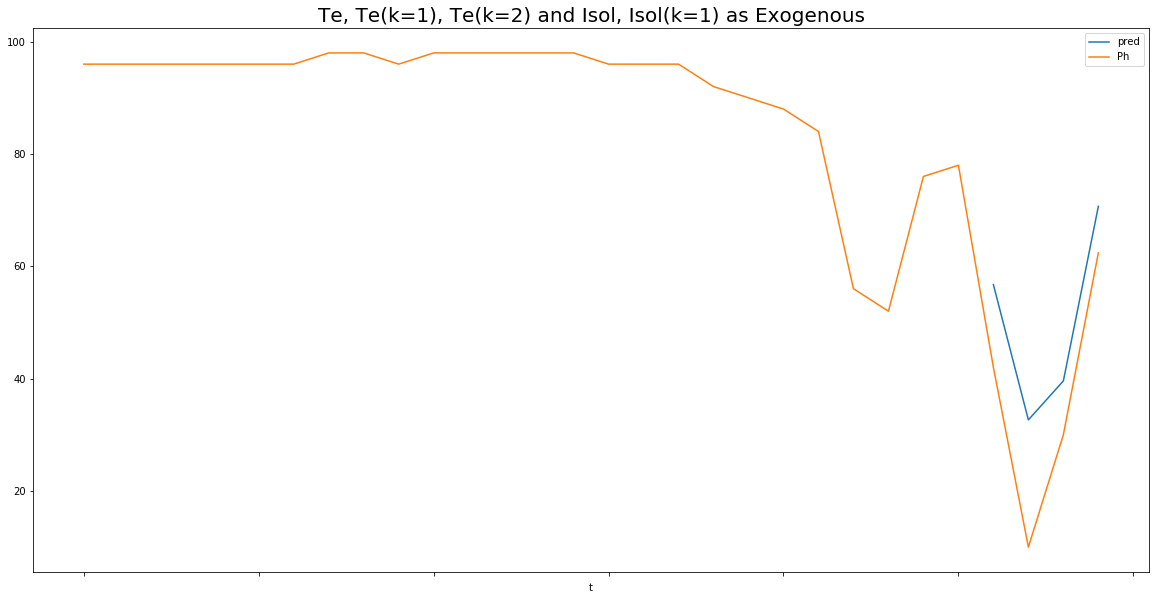

In [68]:
def predict_plot(n):
    preds = results.forecast(steps= n, exog = exog_test.values[:n])
    df_train['pred'] = np.nan
    df_test['pred'] = np.nan
    df_test['pred'].values[-n:] = preds 
    df = pd.concat([df_train, df_test])
    df[['pred', 'Ph']][-30:].plot()
    plt.title('Te, Te(k=1), Te(k=2) and Isol, Isol(k=1) as Exogenous', fontsize=20)
plt.rcParams['figure.figsize'] = [20, 10]

predict_plot(4)

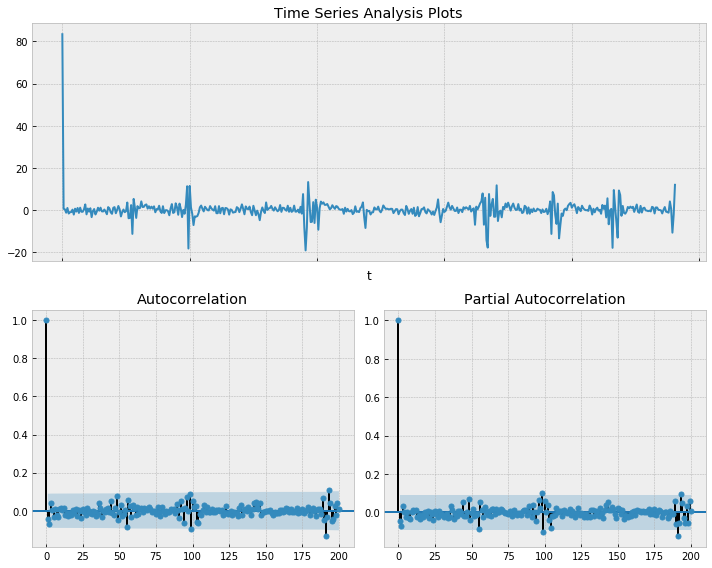

In [67]:
tsplot(results.resid, lags=200)